please enter month:5
please enter year: 2022
British American Tobacco 0.47
Mastercard 0.02
Apple 0.04
Realty Income Corp 0.04
Costco Wholesale Corp 0.02
Procter & Gamble Co 0.12
Royal Bank of Canada 0.26
Starbucks Corporation 0.07


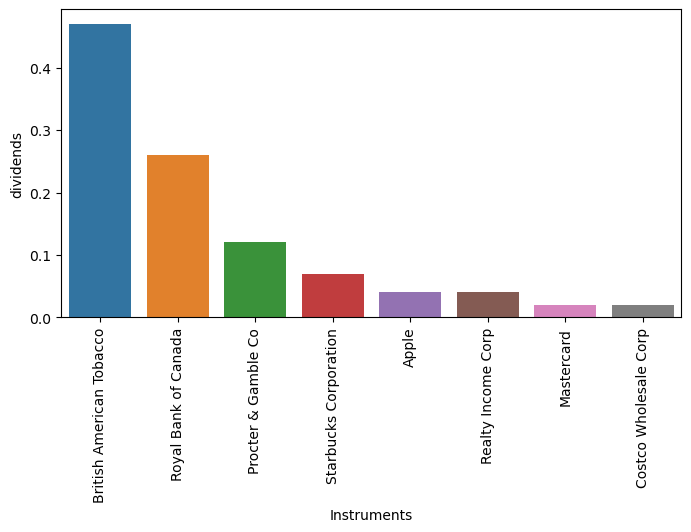

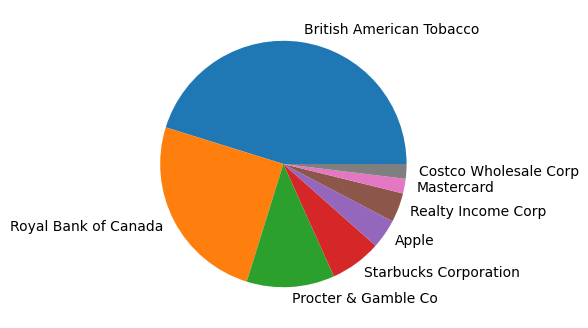

In [3]:
i = input('please enter month:')
j = input('please enter year: ')

i = int(i)
j = int(j)

import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=8,4

dividends = pd.read_excel('dividends.xlsx')
dividends['Date of Payment'] = pd.to_datetime(dividends['Date of Payment'], format='%d/%m/%Y')

def month_year_dividends(i,j):
    dividends_specific_month = dividends[(dividends['Date of Payment'].dt.month == i) & (dividends['Date of Payment'].dt.year == j)]
    return dividends_specific_month

df = month_year_dividends(i,j)

instruments = df['Instrument Name'].unique()

sums_dividends = []

for k in range (0,len(instruments)):
    sum_dividends = df[df['Instrument Name'] == instruments[k]]['Net Dividend Received (USD)'].sum()
    sums_dividends.append(sum_dividends)
    
for k in range (0,len(instruments)):
    print(instruments[k],round(sums_dividends[k],5))
    
data = {'Instruments':instruments,'dividends':sums_dividends}
df_new = pd.DataFrame(data)

df_new_sorted = df_new.sort_values(by='dividends',ascending=False)

sns.barplot(data = df_new_sorted,x='Instruments',y='dividends')
plt.xticks(rotation='vertical')
plt.show()

plt.pie(df_new_sorted.dividends,labels = df_new_sorted.Instruments)
plt.show()